# Read the dataset 1

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/kc_house_data.csv', delimiter=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Scatter plot

## sqft_living vs price

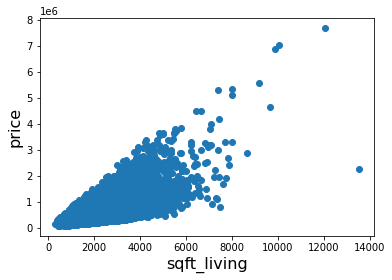

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('sqft_living', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.show()


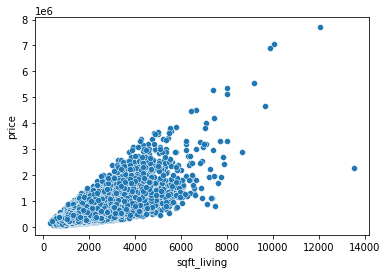

In [20]:
import seaborn as sns

sns.scatterplot(x='sqft_living', y='price', data=df)
plt.show()

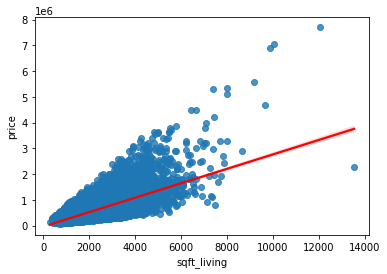

In [21]:
sns.regplot(data=df, x='sqft_living', y='price', line_kws={"color": "red"})
plt.show()

## yr_built vs price

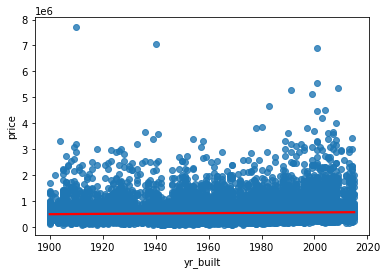

In [22]:
sns.regplot(data=df, x='yr_built', y='price', line_kws={"color": "red"})
plt.show()

# Pearson correlation

## scipy

In [23]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, pval = pearsonr(df['sqft_living'], df['price'])
print('Pearsons correlation: %.3f' % corr)
#print(pval)

Pearsons correlation: 0.702


## numpy

In [25]:
import numpy as np
r = np.corrcoef(df['sqft_living'], df['price'])
print(r)
print('Pearsons correlation: %.3f' % r[0,1])

[[1.         0.70203505]
 [0.70203505 1.        ]]
Pearsons correlation: 0.702


## pandas

In [26]:
import pandas as pd

r = df['sqft_living'].corr(df['price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.702


In [27]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


# Read dataset 2

In [3]:
import pandas as pd
df_churning = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/BankChurners.csv', delimiter=',')
df_churning.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## histogram

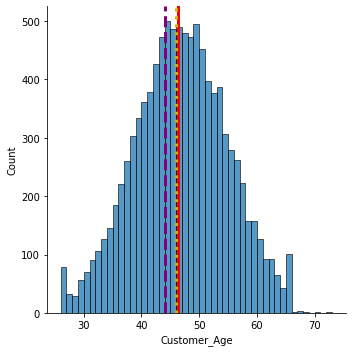

Average :  46.32596030413745
Standard deviation :  8.016814032549084
Median :  46.0
Mode :  44


In [37]:

sns.displot(data=df_churning, x='Customer_Age')
#sns.displot(data=df_churning, x='Customer_Age', hue='Attrition_Flag', kde=True)
average = df_churning['Customer_Age'].mean()
median = df_churning['Customer_Age'].median()
mode = df_churning['Customer_Age'].mode()
std = df_churning['Customer_Age'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

## probability mass function (pmf)

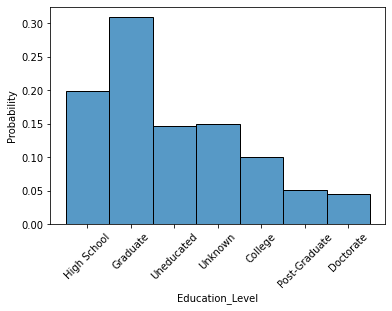

In [38]:
from scipy.stats import norm

sns.histplot(data=df_churning, x='Education_Level',stat="probability")     
#sns.histplot(data=df_churning, x='Education_Level',stat="probability", hue='Attrition_Flag') 
plt.xticks(rotation='45')                                  
plt.show()

In [5]:
df_churning['Education_Level'].value_counts(normalize=True)

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

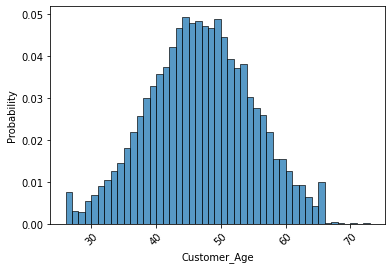

In [40]:
sns.histplot(data=df_churning, x='Customer_Age',stat="probability")     
#sns.histplot(data=df_churning, x='Customer_Age',stat="probability", hue='Attrition_Flag') 
plt.xticks(rotation='45')                                  
plt.show()

## probability density function (pdf)

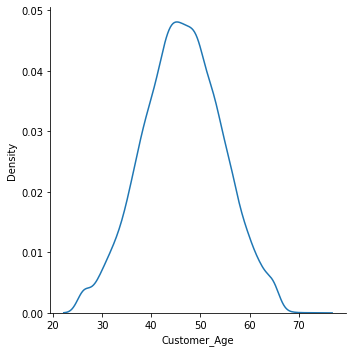

In [41]:

#sns.displot(data=df_churning, x='Customer_Age', kind="kde", hue='Attrition_Flag')
sns.displot(data=df_churning, x='Customer_Age', kind="kde")
plt.show()

In [42]:
from scipy.stats import norm
average = df_churning['Customer_Age'].mean()
std = df_churning['Customer_Age'].std()

a=norm.cdf(50,average, std)
#b=norm.cdf(40,average, std)
#c=b-a
a

0.6766285731328309

## cummulative density function (cdf)

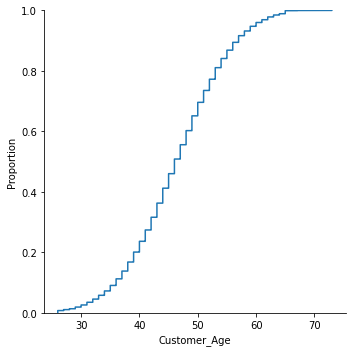

In [43]:
#ns.displot(data=df_churning, x='Customer_Age', kind="ecdf", hue='Attrition_Flag')
sns.displot(data=df_churning, x='Customer_Age', kind="ecdf")

plt.show()

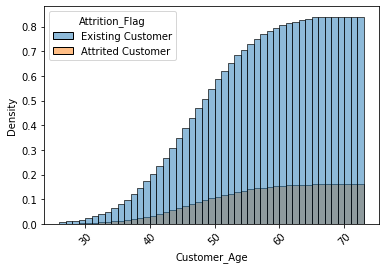

In [44]:
sns.histplot(data=df_churning, x='Customer_Age',stat="density", cumulative=True, hue='Attrition_Flag')     
plt.xticks(rotation='45')                                  
plt.show()

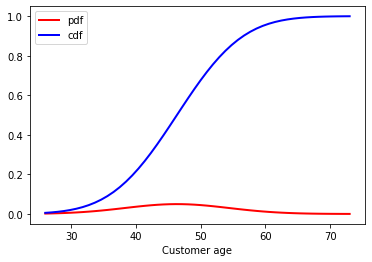

In [45]:
from scipy.stats import norm

min = df_churning['Customer_Age'].min()
max = df_churning['Customer_Age'].max()

mean = df_churning['Customer_Age'].mean()
std = df_churning['Customer_Age'].std()


x_pdf = np.linspace(min, max)
y_pdf = norm.pdf(x_pdf, mean, std)
y_cdf = norm.cdf(x_pdf, mean, std)


plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')   
plt.plot(x_pdf, y_cdf, 'b', lw=2, label='cdf')   
plt.legend()                                               
plt.xlabel('Customer age')
plt.show()


## normal distribution

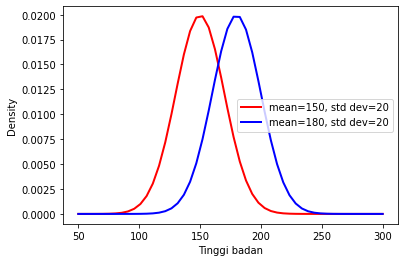

In [46]:
from scipy.stats import norm

x_pdf = np.linspace(50, 300)
y1_pdf = norm.pdf(x_pdf, 150, 20)
y2_pdf = norm.pdf(x_pdf, 180, 20)


plt.plot(x_pdf, y1_pdf, 'r', lw=2, label='mean=150, std dev=20')   
plt.plot(x_pdf, y2_pdf, 'b', lw=2, label='mean=180, std dev=20')   
plt.legend()                       
plt.xlabel('Tinggi badan')
plt.ylabel('Density')                         
plt.show()

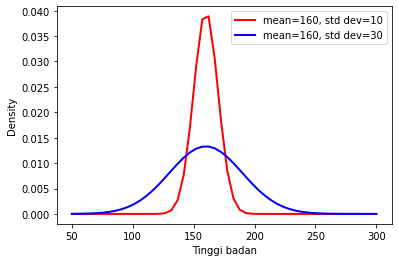

In [47]:
from scipy.stats import norm

x_pdf = np.linspace(50, 300)
y1_pdf = norm.pdf(x_pdf, 160, 10)
y2_pdf = norm.pdf(x_pdf, 160, 30)


plt.plot(x_pdf, y1_pdf, 'r', lw=2, label='mean=160, std dev=10')   
plt.plot(x_pdf, y2_pdf, 'b', lw=2, label='mean=160, std dev=30')   
plt.legend()                       
plt.xlabel('Tinggi badan')
plt.ylabel('Density')                         
plt.show()

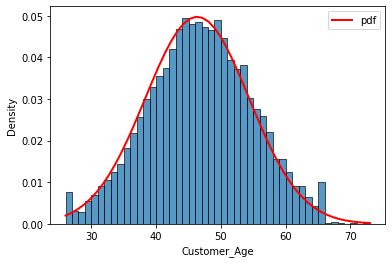

In [49]:
from scipy.stats import norm
import numpy as np

min = df_churning['Customer_Age'].min()
max = df_churning['Customer_Age'].max()

mean = df_churning['Customer_Age'].mean()
std = df_churning['Customer_Age'].std()


x_pdf = np.linspace(min, max)
y_pdf = norm.pdf(x_pdf, mean, std)

sns.histplot(data=df_churning, x='Customer_Age',stat="density")
plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')       
plt.legend()                                            
plt.show()

## skewness

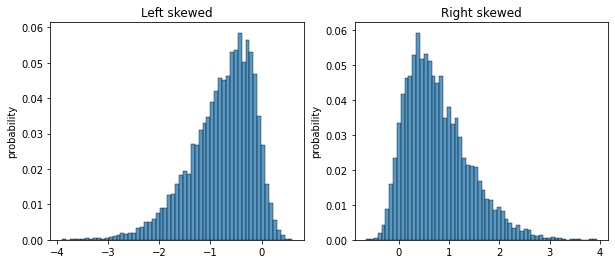

In [50]:
from scipy.stats import skewnorm
from scipy import stats
import matplotlib.pyplot as plt

numValues = 10000
maxValue = 10
left_skewed = -5  #Negative values are left skewed, positive values are right skewed.
right_skewed = 5  #Negative values are left skewed, positive values are right skewed.

random_left = skewnorm.rvs(left_skewed, size=numValues)  #Skewnorm function
random_right = skewnorm.rvs(right_skewed, size=numValues)  #Skewnorm function
#Plot histogram to check skewness

f, axes = plt.subplots(1,2, figsize=(10, 4))
sns.histplot(data=random_left, stat="probability", ax=axes[0])
axes[0].set_title('Left skewed')
axes[0].set_ylabel('probability')

sns.histplot(data=random_right, stat="probability", ax=axes[1])
axes[1].set_title('Right skewed')
axes[1].set_ylabel('probability')

plt.show()

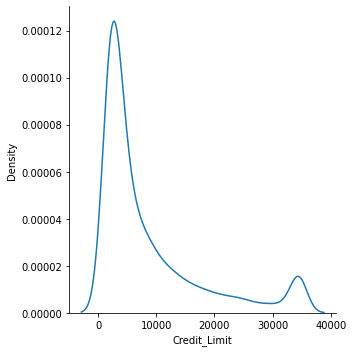

In [51]:
sns.displot(data=df_churning, x='Credit_Limit', kind="kde")
plt.show()

# Statistical plot

In [52]:
existing_data = df_churning[(df_churning.Attrition_Flag == 'Existing Customer')]
attrited_data = df_churning[(df_churning.Attrition_Flag == 'Attrited Customer')]

## pie chart

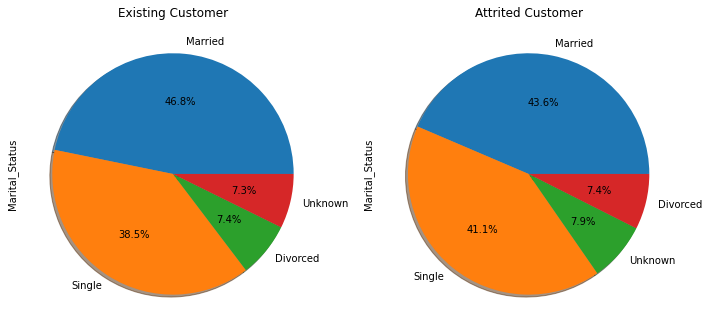

In [53]:
f, axes = plt.subplots(1,2, figsize=(10, 6))
existing_data['Marital_Status'].value_counts().plot(kind='pie',ax=axes[0], title='Existing Customer', autopct='%1.1f%%', shadow=True)
attrited_data['Marital_Status'].value_counts().plot(kind='pie',ax=axes[1], title='Attrited Customer', autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.show()

## bar plot

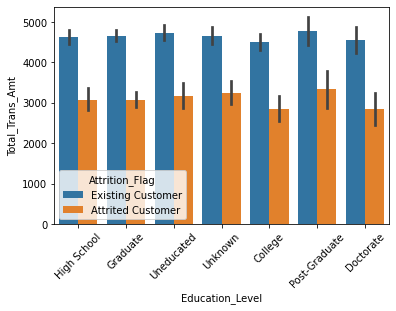

In [54]:
import seaborn as sns

sns.barplot(x='Education_Level', y='Total_Trans_Amt',data=df_churning, hue='Attrition_Flag')
plt.xticks(rotation='45')   
plt.show()

## histogram

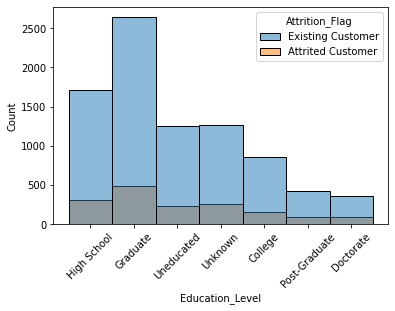

In [55]:
from scipy.stats import norm

sns.histplot(data=df_churning, x='Education_Level', hue='Attrition_Flag')     
plt.xticks(rotation='45')                                  
plt.show()

## scatter plot

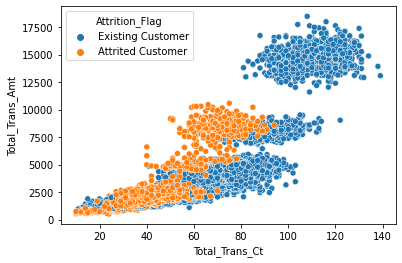

In [56]:
import seaborn as sns

sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', data=df_churning, hue='Attrition_Flag')
plt.show()

## boxplot

In [57]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

salary_data = [int(random.gauss(5000, 1000)) for i in range(2000)]
df_salary = pd.DataFrame(salary_data, columns=['salary_usd'])
print(df_salary.head())
print(df_salary.describe())

   salary_usd
0        5061
1        5478
2        6009
3        5044
4        5144
        salary_usd
count  2000.000000
mean   5004.335000
std     998.606171
min    1763.000000
25%    4311.500000
50%    4985.000000
75%    5695.250000
max    8499.000000


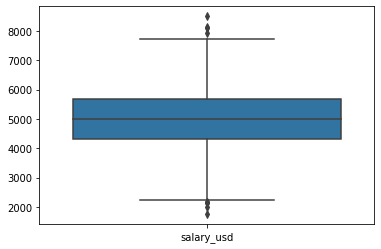

In [58]:
sns.boxplot(data=df_salary)
plt.show()

In [59]:
q1 = df_salary.quantile(0.25);
q3 = df_salary.quantile(0.75);

#print(q1)
min = q1 - (1.5 * (q3-q1))
max = q3 + (1.5 * (q3-q1))
print('batas bawah : ', int(min))
print('batas atas :', int(max))

batas bawah :  2235
batas atas : 7770


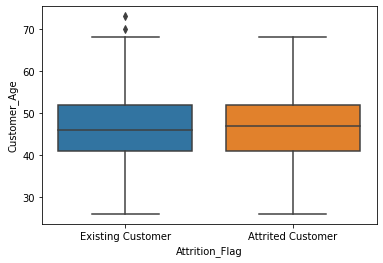

In [60]:
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=df_churning)
plt.show()

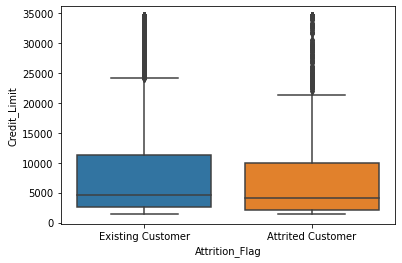

In [61]:
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=df_churning)
plt.show()

## heatmap

In [62]:

df_group = df_churning.groupby(['Education_Level', 'Income_Category']).size().unstack()
df_group

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Education_Level,,,,,,
College,70,183,132,175,345,108
Doctorate,37,70,59,57,158,70
Graduate,204,553,422,478,1139,332
High School,147,355,307,308,671,225
Post-Graduate,30,111,77,81,170,47
Uneducated,119,249,195,217,522,185
Unknown,120,269,210,219,556,145


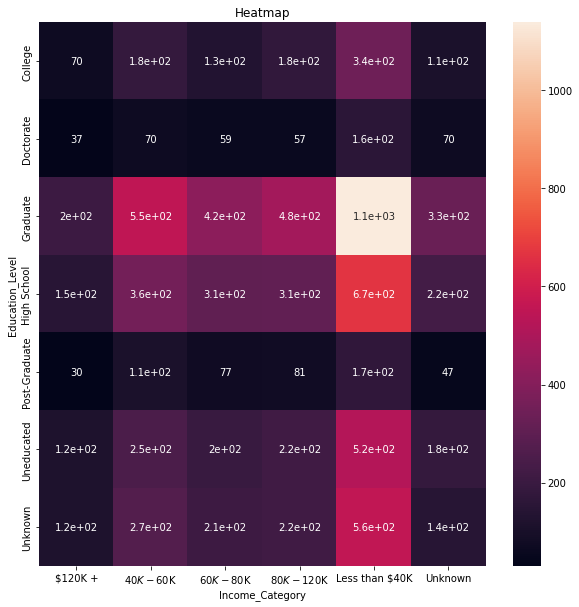

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,10))
sns.heatmap(df_group, annot=True,)
plt.title("Heatmap");
plt.show()

## heatmap with correlation

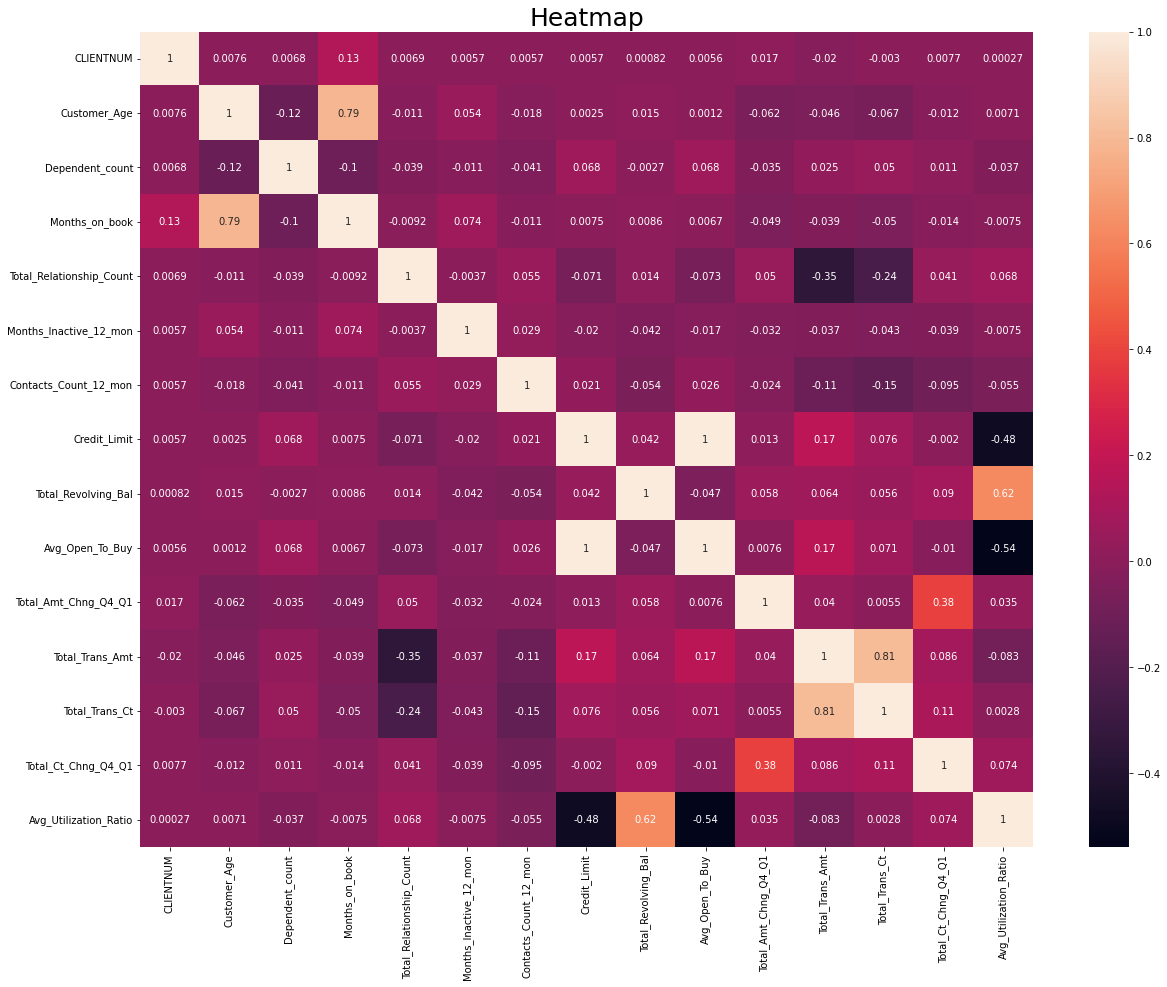

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20,15))
sns.heatmap(df_churning.corr(), annot=True, )
plt.title("Heatmap", fontsize = 25);
plt.show()

## line plot

In [65]:
import pandas as pd
df_iot = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/datatraining.txt', delimiter=',')
df_iot.head()
#df_iot.describe()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


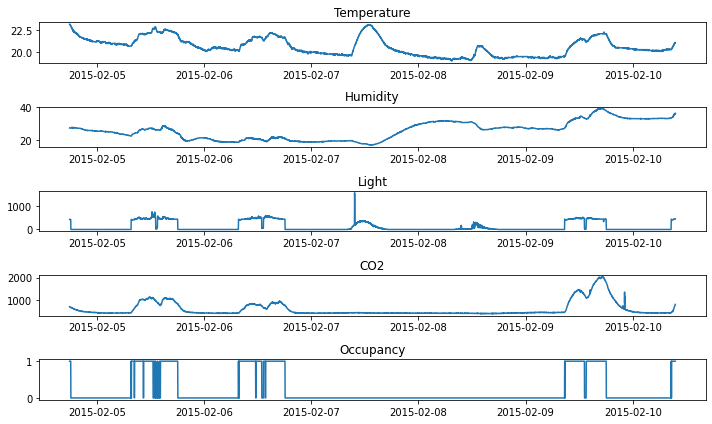

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as dt

df_iot['date'] = pd.to_datetime(df_iot['date'])

figure, axis = plt.subplots(5, figsize=(10, 6))
  
axis[0].plot(df_iot['date'], df_iot['Temperature'])
axis[0].set_title("Temperature")

axis[1].plot(df_iot['date'], df_iot['Humidity'])
axis[1].set_title("Humidity")

axis[2].plot(df_iot['date'], df_iot['Light'])
axis[2].set_title("Light")

axis[3].plot(df_iot['date'], df_iot['CO2'])
axis[3].set_title("CO2")

axis[4].plot(df_iot['date'], df_iot['Occupancy'])
axis[4].set_title("Occupancy")
  
# Combine all the operations and display
figure.tight_layout()
plt.show()